In [2]:
import numpy as np
import matplotlib.pyplot as plt

# from scipy import optimize

from utils import count_arrival
from data import create_dataset

In [18]:
x, lengths = create_dataset(8000, 50)

In [33]:
data = np.load("train.npz")
x = data["x"]
lengths = data["lengths"]

In [36]:
np.array(lengths).max()

88

In [21]:
y = np.log(x[:, :82])
y = np.diff(y, axis=1)

In [22]:
y.shape

(8000, 81)

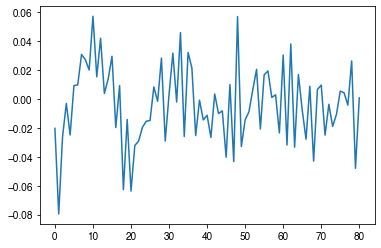

In [23]:
plt.plot(y.mean(axis=0));

In [3]:
x = np.load("train.npy")

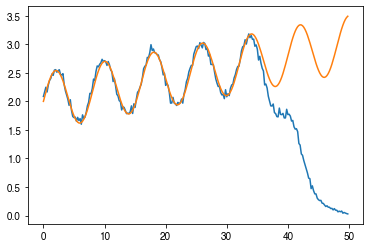

In [6]:
t, rate = count_arrival(x, 0.2, max_=50)
rate = rate.mean(axis=0)
true_rate = 0.5 * np.sin(np.pi / 4 * t) + 0.02 * t + 2
plt.plot(t, rate)
plt.plot(t, true_rate)

In [4]:
t, rate = count_arrival(x, 0.2, max_=25, lengths=lengths)
rate = rate.mean(axis=0)
true_rate = 0.5 * np.sin(np.pi / 4 * t) + 0.02 * t + 2
plt.plot(t, rate)
plt.plot(t, true_rate)

NameError: name 'lengths' is not defined

In [6]:
x = np.log(x)
m = x.mean(axis=0)
t = np.arange(200)

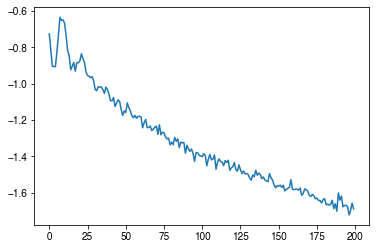

In [7]:
plt.plot(t, m)

In [8]:
def f(t, a, b, c, d, e):
    return a * np.float_power(b * t + c, -d) + e

In [9]:
params, _ = optimize.curve_fit(f, t, m, p0=[0.1, 0.1, 0.1, 0.1, 0.1], maxfev=12000)

/tmp/ipykernel_4839/825956718.py:2: RuntimeWarning: invalid value encountered in float_power
  return a * np.float_power(b * t + c, -d) + e


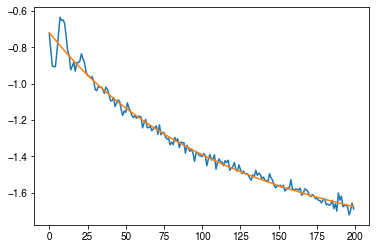

In [10]:
plt.plot(t, m)
plt.plot(t, f(t, *params))

In [8]:
np.save("params", params)

In [11]:
t2 = np.arange(400)
r = f(t2, *params)

x = create_dataset(4000, 400)
x = np.log(x)
m = x.mean(axis=0)

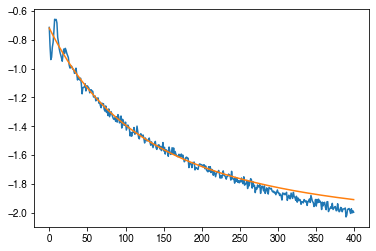

In [12]:
plt.plot(t2, m)
plt.plot(t2, r)